# **Lateral Boundary Diffusion idealized test cases**

This notebook shows results from idealized tests cases where only neutral diffusion and/or lateral diffusion are acting (i.e., dynamics and vertical diffusion are turned off). 

## Model setup 

### Domain, boundary conditions and grid resolution
The horizontal extent of the domain is 200 x 200 km with a constant horizontal grid spacing in both zonal ($x$) and meridional ($y$) directions ($\Delta x$ = $\Delta y$ = 100 km). The east and west boundaries are closed and the north and south boundaries are pediodic. The ocean bottom is flat and 500 m deep. Two different vertical coordiate systems are used: $Z*$ and a hybrid between Z* near the surface and isopycnal below. The total number of grid poins in the vertical is 80, regardless the choise of vertical coordinate. A constant vertical grid spacing ($\Delta z$ = 10 m) is imposed when using Z*. When using a hybrid coordinate $\Delta z$ = 10 m in the upper 100 m of the ocean and below that 40 isopycnal are imposed (provide additional info).  

### Initial conditions and equation of state
The ocean salinity ($S$) is set to 35 psu everywhere. The initial potential temperature ($\theta$) varies linearly with depth $\partial_z \theta$ = -3 $\times$ 10$^{-2}$ $^o$C m$^{-1}$. At x = 0 km, $\theta(z=0)$ = 20 $^o$C and  $\theta(z=400)$ = 5 $^o$C. A zonal gradient in $\theta$ is imposed throughout the entire water column following $\partial_x \theta$ = 5 $\times$ 10$^{-3}$ $^o$C km$^{-1}$ (i.e., $\theta$ is 1$^o$C colder at x = 200 km).  
 
A linear equation of state is used following

$\rho = \rho_0 + (\partial_\theta \rho \times \theta) + (\partial_S \rho \times S)$,

where $\rho_0$ = 1000 kg m$^{-3}$ is the density when $\theta$ = 0 and S = 0 psu, $\partial_\theta \rho$ = -0.255 kg m$^{-3}$ $^o$C$^{-1}$ is the partial derivative of density with respect to potential temperatue and $\partial_S \rho$ =  0.764 kg m$^{-3}$ psu$^{-1}$ is the partial derivative of density with respect to salinity. Since $\rho$ does not depend on either pressure or the geographic location, the concept of neutral density does not apply here __elaborate here__. Figure 1a shows the initial $\theta$ with corresponding isopycnals. 

<figure>
 <img  src="initial_conditions.png" alt="Figure 1" />
 <figcaption>
     
 Figure 1: Initial conditions. a) colors show potentail temperature ($\theta$, $^o$C) and white contours show isopycnals every 5 kg m$^{-3}$; b) passive tracer #1 ()
 </figcaption>
</figure>

To isolate the effects of neutral diffusion from those due to lateral diffusion two passive tracers ($\tau_1$ and $\tau_2$) are used with concentrations ranging from 0 to 1. For $\tau_1$ only a vertical gradient is imposed such that $\tau_1(z=0)$ = 0 while $\tau_1(z=400)$ = 1.0. For $\tau_2$ only a horizontal gradient is imposed where $\tau_2(x=0)$ = 0 km while $\tau_2(x=200)$ = 1.0


KHTR = 1000 m$^2$ s$^{-1}$

In [1]:
import sys
sys.path.insert(0, '/glade/u/home/gmarques/Notebooks/Horizontal_boundary_diffusion')

In [2]:
from mom6_tools.m6plot import ztplot
from mom6_tools.MOM6grid import MOM6grid
from IPython.display import display, Markdown, Latex
from mom6_tools.m6plot import xycompare, xyplot, setFigureSize, chooseColorLevels, \
                       createYZlabels, myStats, yzWeight, boundaryStats, label
from mom6_tools.m6toolbox import section2quadmesh
import xarray as xr
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
from misc import yzplot
warnings.filterwarnings("ignore")
%matplotlib inline

Basemap module not found. Some regional plots may not function properly


In [3]:
path = '/glade/work/gmarques/Projects/Horizontal_bnd_diffusion/idealized_2columns/'
grd = MOM6grid(path+'HBD-Z/static.nc')

MOM6 grid successfully loaded... 



In [4]:
IC_Z = xr.open_dataset(path+'HBD-Z/MOM_IC.nc')
IC_H = xr.open_dataset(path+'HBD-H/MOM_IC.nc')

In [5]:
x1 = np.linspace(0,200,len(grd.xh))
lon = np.linspace(0,200,len(grd.xh)+1)

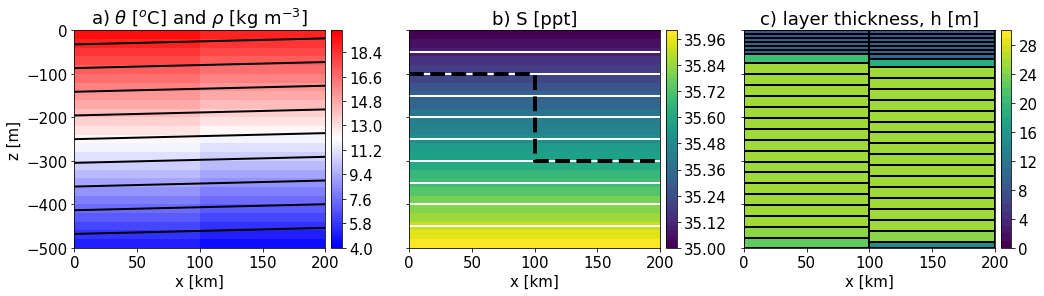

In [6]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})
fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(17,4), sharey=True)
ax = ax1.flatten()
temp = np.ma.masked_invalid(IC_Z.Temp[0,:,0,:].values) 
salt = np.ma.masked_invalid(IC_Z.Salt[0,:,0,:].values) 
rho = -0.255*temp + 0.764*salt
#tr1 = np.ma.masked_invalid(IC_Z.tr1[0,:,0,:].values) 
#tr2 = np.ma.masked_invalid(IC_Z.tr2[0,:,0,:].values) 
eta = IC_Z.eta[0,:,0,:].values 
z1 = 0.5 * (eta[0:-1,1]+eta[1::,1]) 
z2 = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

h_h = IC_H.h[0,:,0,:].values  
e_h = IC_H.eta[0,:,0,:].values  

[X1,Z1] = np.meshgrid(x1,z1)

# a
yzplot(temp, grd.geolon_c[0,:], eta, nbins=100, centerlabels=True, clim=(4., 20.0), 
       show_stats=0, axis=ax[0], colormap=plt.cm.bwr)
ax[0].set_ylabel('z [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title(r'a) $\theta$ [$^o$C] and $\rho$ [kg m$^{-3}$] ')
ax[0].contour(X1,z2,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=2)

#b
BLD = np.zeros(len(grd.geolon_c[0,:])+1)
BLD[0:2]= -100.; BLD[2::] = -300.
x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]

yzplot(salt, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(35., 36.), show_stats=0, axis=ax[1])
ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title(r'b) S [ppt]')
ax[1].contour(X1,z2,salt, levels=np.arange(35,36, 0.1), colors='w', linewidths=2)
ax[1].plot(x_BLD,BLD,'k--',linewidth=4)

#c
yzplot(h_h, grd.geolon_c[0,:], e_h, nbins=30, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(0, 30.), show_stats=0, axis=ax[2])
ax[2].set_ylabel('') 
ax[2].set_xlabel('x [km]') 
ax[2].set_title(r'c) layer thickness, h [m]')
ax[2].plot([0,0],[-500,0], 'k', lw=2)
ax[2].plot([100,100],[-500,0], 'k', lw=2)
ax[2].plot([200,200],[-500,0], 'k', lw=2)
for k in range(len(e_h[:,0])):
  ax[2].plot([0,100],np.ones(2)*e_h[k,0], 'k', lw=2)
  ax[2].plot([100,200],np.ones(2)*e_h[k,1], 'k', lw=2)
    
#ax[2].contour(X1,z2,tr2, levels=np.arange(0,1, 0.01), colors='w', linewidths=2)

plt.savefig('initial_conditions.png',bbox_inches='tight')

In [7]:
#IC_Z = xr.open_dataset(path+'case1/LBD-Z/MOM_IC.nc')
IC_H = xr.open_dataset(path+'HBD-H/MOM_IC.nc')

In [8]:
def get_rho(temp,salt):
    return -0.255*temp + 1035

In [9]:
h_l = IC_H['h'][0,:,0,0].values
h_r = IC_H['h'][0,:,0,1].values
e_l = IC_H['eta'][0,:,0,0].values
e_r = IC_H['eta'][0,:,0,1].values
s_l = IC_H['Salt'][0,:,0,0].values
s_r = IC_H['Salt'][0,:,0,1].values
t_l = IC_H['Temp'][0,:,0,0].values
t_r = IC_H['Temp'][0,:,0,1].values
r_l = get_rho(t_l, s_l)
r_r = get_rho(t_r, s_r)

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l',
        'hl','hr','el','er','sl','sr','tl','tr','rl','rr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],e_l[l],e_r[l], s_l[l], s_r[l], t_l[l], t_r[l], r_l[l], r_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,e_l[l+1],e_r[l+1],np.nan,np.nan,np.nan,np.nan, np.nan,np.nan))

   l         hl         hr         el         er         sl         sr         tl         tr         rl         rr
    0     8.9300     8.9300    -0.0000    -0.0000    35.0082    35.0082    19.6264    19.1264  1029.9953  1030.1228
    1     8.9700     8.9700    -8.9300    -8.9300    35.0268    35.0268    19.3480    18.8480  1030.0663  1030.1938
    2     9.0500     9.0500   -17.9000   -17.9000    35.0449    35.0449    19.0773    18.5773  1030.1353  1030.2628
    3     9.1900     9.1900   -26.9500   -26.9500    35.0631    35.0631    18.8036    18.3036  1030.2051  1030.3326
    4     9.4400     9.4400   -36.1400   -36.1400    35.0817    35.0817    18.5242    18.0242  1030.2763  1030.4038
    5     9.9000     9.9000   -45.5800   -45.5800    35.1011    35.1011    18.2341    17.7341  1030.3503  1030.4778
    6    20.3697    10.6700   -55.4800   -55.4800    35.1313    35.1216    17.7801    17.4256  1030.4661  1030.5565
    7    25.0979    18.1310   -75.8497   -66.1500    35.1768    35.1504  

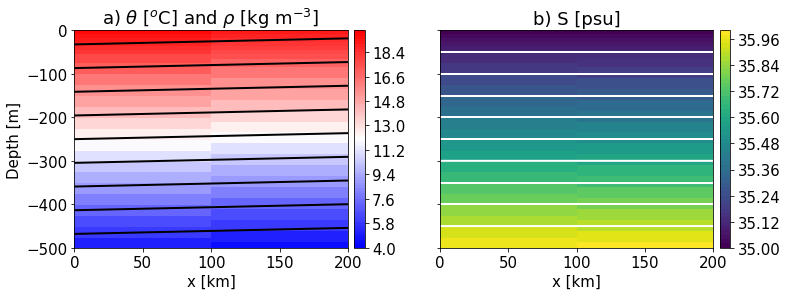

In [10]:
%matplotlib inline

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)
temp = np.ma.masked_invalid(IC_H.Temp[0,:,0,:].values) 
salt = np.ma.masked_invalid(IC_H.Salt[0,:,0,:].values) 
rho = -0.255*temp + 0.764*salt
#tr1 = np.ma.masked_invalid(IC_H.tr1[0,:,0,:].values) 
#tr2 = np.ma.masked_invalid(IC_H.tr2[0,:,0,:].values) 
eta = IC_H.eta[0,:,0,:].values 
h = IC_H.h[0,:,0,:].values 

z1 = 0.5 * (eta[0:-1,1]+eta[1::,1]) 
z2 = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

[X1,Z1] = np.meshgrid(x1,z1)
# a
yzplot(temp, grd.geolon_c[0,:], eta, nbins=100, centerlabels=True, clim=(4., 20.0), 
       show_stats=0, axis=ax[0], colormap=plt.cm.bwr)
ax[0].set_ylabel('Depth [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title(r'a) $\theta$ [$^o$C] and $\rho$ [kg m$^{-3}$] ')
ax[0].contour(X1,z2,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=2)

#b
yzplot(salt, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(35., 36.), show_stats=0, axis=ax[1])
ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title(r'b) S [psu]')
ax[1].contour(X1,z2,salt, levels=np.arange(35,36, 0.1), colors='w', linewidths=2)

plt.savefig('initial_conditions_hybrid.png',bbox_inches='tight')

In [11]:
def make_plot(case,grd,IC,BLD_L,BLD_R, n=0):
  %matplotlib inline  
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
  ax1 = ax.flatten()
  rho = np.ma.masked_invalid(case.rhopot2[n,:,0].values) - 1000.
  lbd_tr1 = np.ma.masked_invalid(case.tr2_lbdxy_cont_tendency[n,:,0].values)
  Z = case.e[n,:,0].values 
  #Z = 0.5 * (eta[0:-1,1]+eta[1::,1])

  yzplot(lbd_tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1.e-7, 1.e-7), show_stats=1,
         axis=ax1[0])
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  #for k in range(len(case.z_i)):
  #  ax1[0].plot([x_BLD[0],x_BLD[-1]],-np.ones(2)*case.z_i[k].values,'gray',linewidth=0.5)

  ax1[0].set_title(r'a) LBD $\tau_1$')
  ax1[0].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd_tr2 = np.ma.masked_invalid(case.S_hbdxy_cont_tendency[n,:,0].values)
  yzplot(lbd_tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-18, 1e-18),show_stats=1,
       title='b) LBD S', axis=ax1[1])
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4); ax1[1].set_ylabel('')
  ax1[1].set_title('b) LBD S')
  ax1[1].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
               
  nd_tr1 = np.ma.masked_invalid(case.tr2_dfxy_cont_tendency[n,:,0].values)
  yzplot(nd_tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-7, 1e-7), show_stats=1,
         title=r'c) ND $\tau_1$', axis=ax1[2])
  ax1[2].set_ylabel('Depth [m]'); ax1[2].set_xlabel('Longitude [$^o$E]')
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title(r'c) ND $\tau_1$')
  ax1[2].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
               
  nd_tr2 = np.ma.masked_invalid(case.S_dfxy_cont_tendency[n,:,0].values)
  yzplot(nd_tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-7, 1e-7), show_stats=1,
         axis=ax1[3])
  ax1[3].set_title('d) ND S')
  ax1[3].set_xlabel('Longitude [$^o$E]')
  ax1[3].set_ylabel('')
  ax1[3].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[3].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  # plot difference
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True, sharey=True)
  ax1 = ax.flatten()
  
  # temp
  temp = np.ma.masked_invalid((case.temp[-1,:,0].values-IC.Temp[0,:,0,:].values))
  yzplot(temp, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[0])
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].set_xlabel('Longitude [$^o$E]')
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title(r'a) $\Delta \theta$ [$^o$C]',fontsize=15)

  # tr1
  tr1 = np.ma.masked_invalid((case.salt[-1,:,0].values-IC.Salt[0,:,0,:].values))
  yzplot(tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[1])
  ax1[1].set_ylabel(''); ax1[1].set_xlabel('') 
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[1].set_title(r'b) $\Delta S$ [psu]',fontsize=15)
    
  # tr2
  tr2 = np.ma.masked_invalid((case.tr2[-1,:,0].values-IC.tr2[0,:,0,:].values))
  yzplot(tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[2])
  ax1[2].set_ylabel(''); ax1[2].set_xlabel('') 
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title(r'c) $\Delta \tau_2$ [kg kg$^{-1}$]',fontsize=15)

  return

In [12]:
 def make_profiles(case1,case2,grd,BLD_L,BLD_R, fname=''):
  %matplotlib inline
  n = 0
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14), sharex=False, sharey=True)
  ax1 = ax.flatten()
  eta1 = case1.e[n,:,0,:].values 
  eta2 = case2.e[n,:,0,:].values  
  h1 = case1.h[n,:,0,:].values 
  h2 = case2.h[n,:,0,:].values
    
  Z1 = (eta1[0:-1,:] + eta1[1::,:])*0.5 
  Z2 = (eta2[0:-1,:] + eta2[1::,:])*0.5 
 
  var = 'T_hbdxy_cont_tendency' 
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[0].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[0].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[0].plot(lbd1[:,0], Z1[:,0], '-*',label='HBD-Z x=50 km', lw=2)
  ax1[0].plot(lbd1[:,1], Z1[:,1], '-*',label='HBD-Z x=150 km', lw=2)
  ax1[0].plot(lbd2[:,0], Z2[:,0], '-*',label='HBD-H x=50 km', lw=2)
  ax1[0].plot(lbd2[:,1], Z2[:,1], '-*',label='HBD-H x=150 km', lw=2)
  ax1[0].set_ylabel('z [m]') 
  #ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title(r'a) $\theta$ tendency, HBD')
  ax1[0].set_xlabel(r'$\partial_t \theta$ [{}]'.format(units))
  ax1[0].grid()
  ax1[0].set_xlim(-dummy,dummy)

  var = 'T_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[1].hlines(BLD_L, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[1].hlines(BLD_R, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[1].plot(nd1[:,0], Z1[:,0],'-*', label='HBD-Z x=50 km', lw=2)
  ax1[1].plot(nd1[:,1], Z1[:,1], '-*',label='HBD-Z x=150 km', lw=2)
  ax1[1].plot(nd2[:,0], Z2[:,0], '-*',label='HBD-H x=50 km', lw=2)
  ax1[1].plot(nd2[:,1], Z2[:,1], '-*',label='HBD-H x=150 km', lw=2)
  ax1[1].set_title(r'b) $\theta$ tendency, neutral diffusion')
  ax1[1].set_xlabel(r'$\partial_t \theta$ [{}]'.format(units))
  ax1[1].legend(loc='upper left', ncol=1)
  ax1[1].grid()
  ax1[1].set_xlim(-1e-12,1e-12)


  var = 'S_hbdxy_cont_tendency'
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[2].hlines(BLD_L, -1e-12, 1e-12, colors='k', linestyles='dashed')
  ax1[2].hlines(BLD_R, -1e-12, 1e-12, colors='k', linestyles='dashed')
  ax1[2].plot(lbd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[2].plot(lbd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[2].plot(lbd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[2].plot(lbd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[2].set_ylabel('z [m]') 
  ax1[2].set_title('c) S tendency, HBD')
  ax1[2].set_xlabel(r'$\partial_t S$ [{}]'.format(units))
  ax1[2].grid()
  ax1[2].set_xlim(-1e-12,1e-12)

  var = 'S_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[3].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[3].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[3].plot(nd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[3].plot(nd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[3].plot(nd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[3].plot(nd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[3].set_title('d) S tendency, neutral diffusion')
  ax1[3].set_xlabel(r'$\partial_t S$ [{}]'.format(units))
  ax1[3].grid()
  ax1[3].set_xlim(-dummy,dummy)

  if fname:
    plt.savefig(fname,bbox_inches='tight')

  return

In [13]:
 def make_profiles2(case1,case2,grd,BLD_L,BLD_R, fname=''):
  %matplotlib inline
  n = 0
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14), sharex=False, sharey=True)
  ax1 = ax.flatten()
  eta1 = case1.e[n,:,0,:].values 
  eta2 = case2.e[n,:,0,:].values  
  h1 = case1.h[n,:,0,:].values 
  h2 = case2.h[n,:,0,:].values
    
  Z1 = (eta1[0:-1,:] + eta1[1::,:])*0.5 
  Z2 = (eta2[0:-1,:] + eta2[1::,:])*0.5 
 
  var = 'T_hbdxy_cont_tendency' 
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)/h1
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)/h2
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[0].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[0].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[0].plot(lbd1[:,0], Z1[:,0], '-*',label='HBD-Z x=50 km', lw=2)
  ax1[0].plot(lbd1[:,1], Z1[:,1], '-*',label='HBD-Z x=150 km', lw=2)
  ax1[0].plot(lbd2[:,0], Z2[:,0], '-*',label='HBD-H x=50 km', lw=2)
  ax1[0].plot(lbd2[:,1], Z2[:,1], '-*',label='HBD-H x=150 km', lw=2)
  ax1[0].set_ylabel('z [m]') 
  #ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title(r'a) $\theta$ tendency, HBD')
  ax1[0].set_xlabel(r'$\partial_t \theta$ [{}]'.format(units))
  ax1[0].grid()
  #ax1[0].set_xlim(-1,1)

  var = 'T_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)/h1
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)/h2
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[1].hlines(BLD_L, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[1].hlines(BLD_R, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[1].plot(nd1[:,0], Z1[:,0],'-*', label='HBD-Z x=50 km', lw=2)
  ax1[1].plot(nd1[:,1], Z1[:,1], '-*',label='HBD-Z x=150 km', lw=2)
  ax1[1].plot(nd2[:,0], Z2[:,0], '-*',label='HBD-H x=50 km', lw=2)
  ax1[1].plot(nd2[:,1], Z2[:,1], '-*',label='HBD-H x=150 km', lw=2)
  ax1[1].set_title(r'b) $\theta$ tendency, neutral diffusion')
  ax1[1].set_xlabel(r'$\partial_t \theta$ [{}]'.format(units))
  ax1[1].legend(loc='upper left', ncol=1)
  ax1[1].grid()
  #ax1[1].set_xlim(-1e-12,1e-12)


  var = 'S_hbdxy_cont_tendency'
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)/h1
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)/h2
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[2].hlines(BLD_L, -1e-12, 1e-12, colors='k', linestyles='dashed')
  ax1[2].hlines(BLD_R, -1e-12, 1e-12, colors='k', linestyles='dashed')
  ax1[2].plot(lbd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[2].plot(lbd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[2].plot(lbd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[2].plot(lbd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[2].set_ylabel('z [m]') 
  ax1[2].set_title('c) S tendency, HBD')
  ax1[2].set_xlabel(r'$\partial_t S$ [{}]'.format(units))
  ax1[2].grid()
  #ax1[2].set_xlim(-1e-12,1e-12)

  var = 'S_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)/h1
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)/h2
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[3].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[3].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[3].plot(nd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[3].plot(nd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[3].plot(nd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[3].plot(nd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[3].set_title('d) S tendency, neutral diffusion')
  ax1[3].set_xlabel(r'$\partial_t S$ [{}]'.format(units))
  ax1[3].grid()
  #ax1[3].set_xlim(-dummy,dummy)

  if fname:
    plt.savefig(fname,bbox_inches='tight')

  return

## Results

## HBL(left) = 100; HBL(right) = 300


| Experiment | Vertical coordinate |  BLD left (m) | BLD right (m) | LBD method | Linear transition |
|------------|:-------------------:|:-------------:|:-------------:|:----------:| :----------:      |
| LBD-z*    |          Z*         |      100      |      300      |    layer    |  true             |
| LBD-H     |          HYCOM1     |      100      |      300      |    layer    |  true            |

In [14]:
linear_lbd_z = xr.open_dataset(path+'HBD-Z/prog_z.nc')

In [15]:
#make_plot(case2_lbd_z,grd,IC_Z,BLD_L=-100,BLD_R=-300)

In [16]:
linear_lbd_h = xr.open_dataset(path+'HBD-H/prog_z.nc')

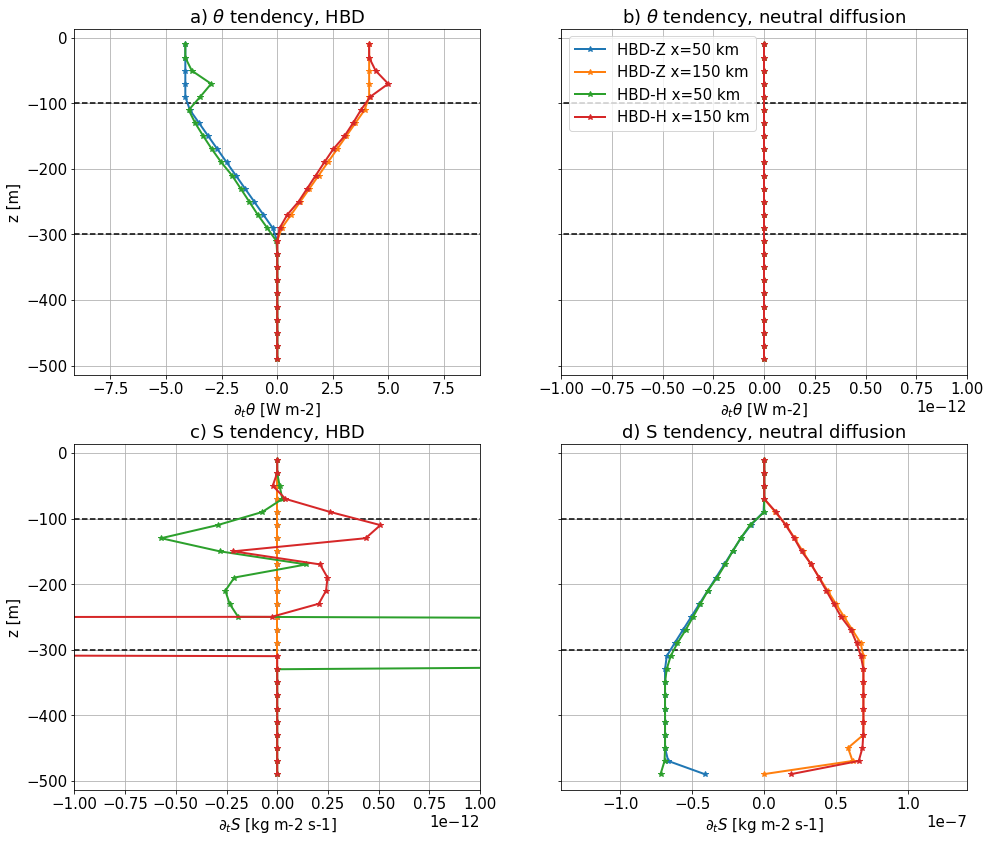

In [17]:
make_profiles(linear_lbd_z,linear_lbd_h,
              grd,BLD_L=-100,BLD_R=-300)#,
              #fname='tendency_profiles_linear')

In [18]:
# HBD = False
case1 = xr.open_dataset(path+'HBD-Z-1/prog.nc')
case2 = xr.open_dataset(path+'HBD-H-1/prog.nc')

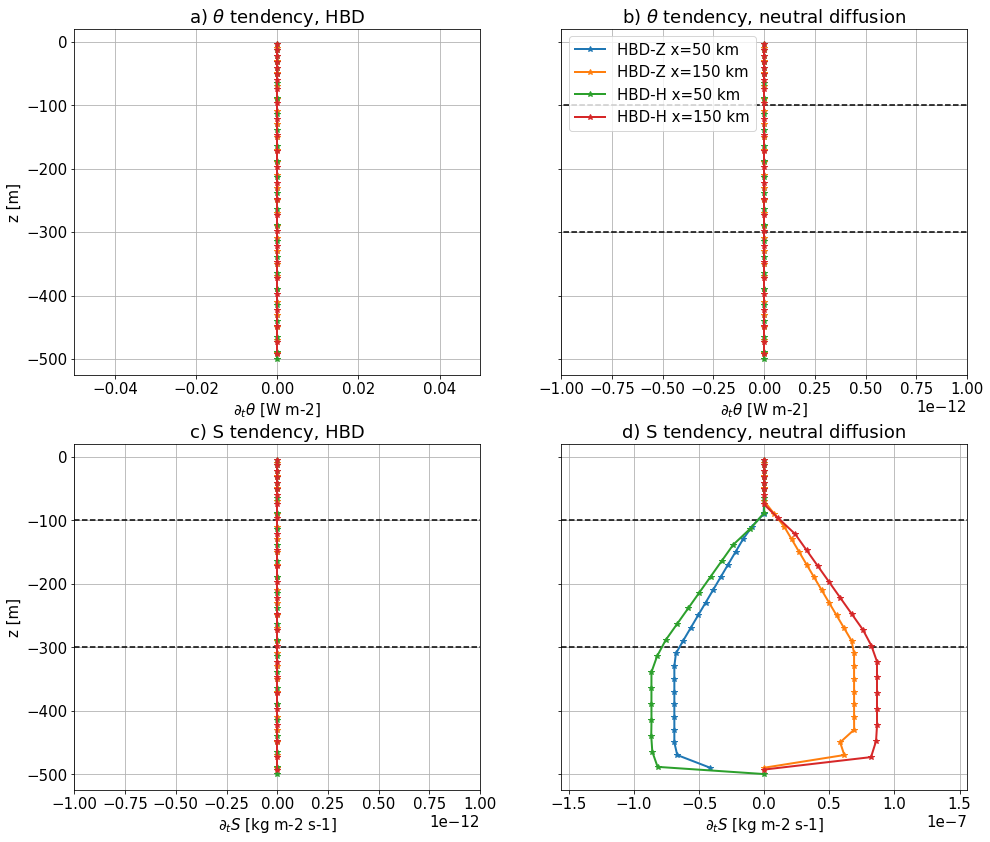

In [19]:
make_profiles(case1,case2, grd,BLD_L=-100,BLD_R=-300)

In [20]:
# ND = False
case3 = xr.open_dataset(path+'HBD-Z-2/prog.nc')
case4 = xr.open_dataset(path+'HBD-H-2/prog.nc')

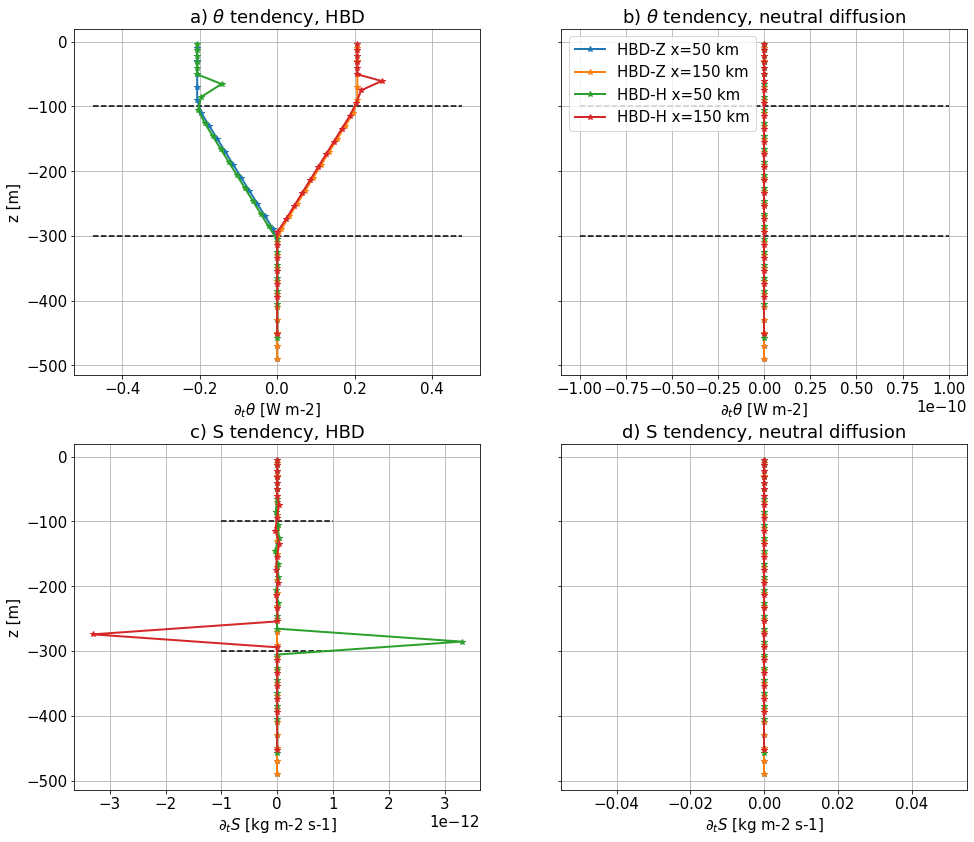

In [21]:
make_profiles2(case3,case4, grd,BLD_L=-100,BLD_R=-300)

In [22]:
# ND = HBD = True
#case5 = xr.open_dataset(path+'HBD-Z-3/prog_z.nc')
#case6 = xr.open_dataset(path+'HBD-H-3/prog_z.nc')

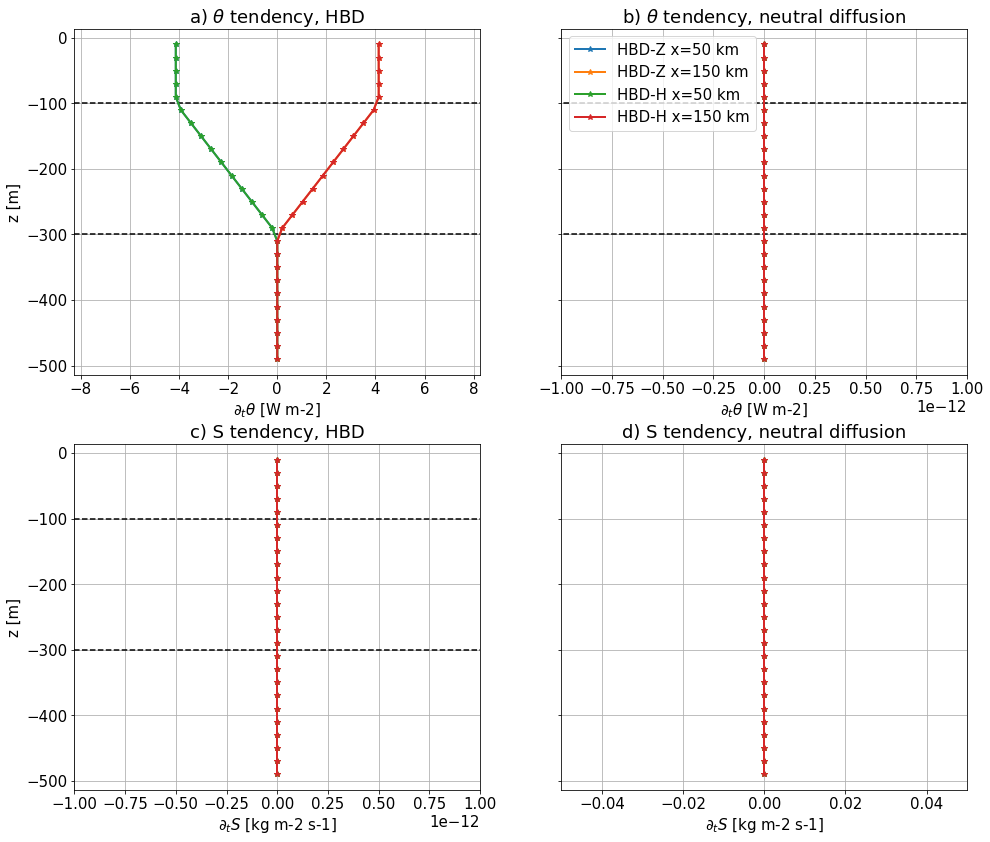

In [23]:
make_profiles(case3,case3, grd,BLD_L=-100,BLD_R=-300)

In [24]:
case2 = xr.open_dataset(path+'HBD-H-2/prog.nc')


h_l = case2['h'][1,:,0,0].values
h_r = case2['h'][1,:,0,1].values
e_l = case2['e'][1,:,0,0].values
e_r = case2['e'][1,:,0,1].values
s_l = case2['salt'][1,:,0,0].values
s_r = case2['salt'][1,:,0,1].values
t_l = case2['temp'][1,:,0,0].values
t_r = case2['temp'][1,:,0,1].values
r_l = get_rho(t_l, s_l)
r_r = get_rho(t_r, s_r)
r_l = case2['S_dfxy_cont_tendency'][1,:,0,0].values * 1.0e6
r_r = case2['S_dfxy_cont_tendency'][1,:,0,1].values * 1.0e6

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l',
        'hl','hr','el','er','sl','sr','tl','tr','rl','rr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:12.10f} {:12.10f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],e_l[l],e_r[l], s_l[l], s_r[l], t_l[l], t_r[l], r_l[l], r_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,e_l[l+1],e_r[l+1],np.nan,np.nan,np.nan,np.nan, np.nan,np.nan))

   l         hl         hr         el         er         sl         sr         tl         tr         rl         rr
    0     8.9300     8.9300     0.0000     0.0000    35.0082    35.0082    19.6256    19.1271 0.0000000000 0.0000000000
    1     8.9700     8.9700    -8.9300    -8.9300    35.0268    35.0268    19.3472    18.8487 0.0000000000 0.0000000000
    2     9.0500     9.0500   -17.9000   -17.9000    35.0449    35.0449    19.0765    18.5780 0.0000000000 0.0000000000
    3     9.1900     9.1900   -26.9500   -26.9500    35.0631    35.0631    18.8029    18.3044 0.0000000000 0.0000000000
    4     9.4400     9.4400   -36.1400   -36.1400    35.0817    35.0817    18.5235    18.0249 0.0000000000 0.0000000000
    5     9.9000     9.9000   -45.5800   -45.5800    35.1011    35.1011    18.2334    17.7348 0.0000000000 0.0000000000
    6    20.0000    10.6700   -55.4800   -55.4800    35.1310    35.1216    17.7852    17.4264 0.0000000000 0.0000000000
    7    20.0000    18.1384   -75.4800   -66.

### Isopycnal slope decay
Check log files.

### TODO

1) what's the best to limit the isopycnal slope?
This is what I have now

HBD_DELTA_H = 20.0              !   [m] default = 0.1
                                ! The maximum change in thickness between two adjacent cells used to
                                ! calculate the maximum isopycnal slope (delta_h/dx) that can be
                                ! represented in the transition from neutral to horizontal
                                
                                
2) Transition from neutral do horizontal
Right now the transition is linear and is based on the interfaces and not cell centers, where the maximum slope is at BLD_max and the slope is zero at SSH.